In [162]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

%matplotlib inline

In [163]:
# Read the dataset
dataSet  = pd.read_csv("DataSet/app-store-apple-data-set-10k-apps/AppleStore.csv")

np.random.seed(42)

# display complete text in columns
pd.set_option('display.max_colwidth', -1)
dataSet.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shopping",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Text(0.5,0,'Number of Apps')

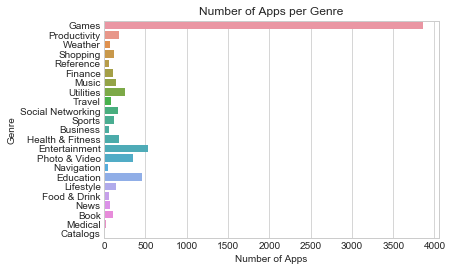

In [164]:
sns.countplot(y='prime_genre',
            data=dataSet,
            orient='h')
plt.title('Number of Apps per Genre')
plt.ylabel('Genre')
plt.xlabel('Number of Apps')

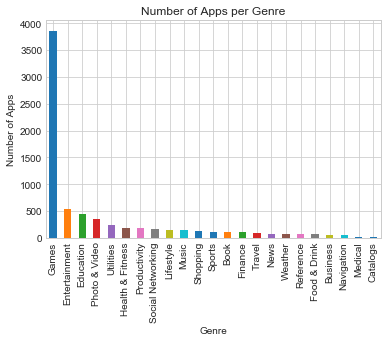

In [165]:
plt.title('Number of Apps per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Apps')
dataSet['prime_genre'].value_counts().plot(kind='bar');

In [166]:
#  Looking at most popular Apps
dataSet[dataSet['rating_count_tot']==dataSet['rating_count_tot'].max()]
# dataSet['track_name'].max()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
16,17,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1


In [167]:
popularGenre = dataSet.groupby(['prime_genre'])['rating_count_tot'].agg({'rating_count_tot':sum})

# reset the Dataframe index
popularGenre.reset_index(inplace=True) 
popularGenre

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,prime_genre,rating_count_tot
0,Book,574049
1,Business,272921
2,Catalogs,17325
3,Education,1014371
4,Entertainment,4030518
5,Finance,1148956
6,Food & Drink,878133
7,Games,52878491
8,Health & Fitness,1784371
9,Lifestyle,887294


Text(0,0.5,'Count')

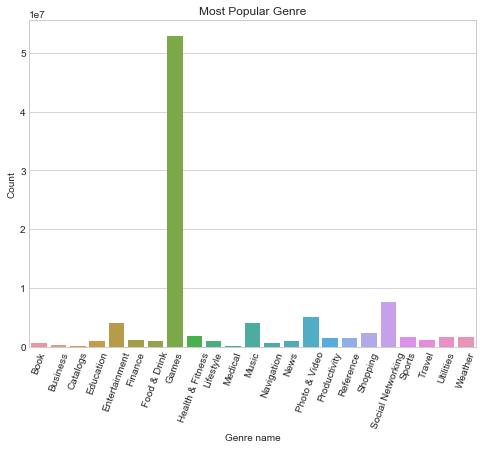

In [168]:
plt.figure(figsize=(8, 6));
g = sns.barplot(x = 'prime_genre', y='rating_count_tot', data=popularGenre)
g.set_xticklabels(rotation=70, labels=popularGenre['prime_genre'])
plt.title('Most Popular Genre')
plt.xlabel('Genre name')
plt.ylabel('Count')

In [169]:
popularApp = dataSet.loc[dataSet.reset_index().groupby(['prime_genre'])['rating_count_tot'].idxmax()]
# reset the Dataframe index
# popularGenre.reset_index(inplace=True) 
popularApp.drop(['Unnamed: 0','id','size_bytes','currency','rating_count_tot','rating_count_ver','user_rating','user_rating_ver', 'ver', 'cont_rating','sup_devices.num','ipadSc_urls.num','lang.num','vpp_lic'], axis=1, inplace=True)
popularApp.set_index('prime_genre', inplace=True)
popularApp

,track_name,price
prime_genre,,
Book,"Kindle – Read eBooks, Magazines & Textbooks",0.00
Business,Indeed Job Search,0.00
Catalogs,CPlus for Craigslist app - mobile classifieds,0.00
Education,"Duolingo - Learn Spanish, French and more",0.00
Entertainment,Netflix,0.00
Finance,Chase Mobile℠,0.00
Food & Drink,Starbucks,0.00
Games,Clash of Clans,0.00
Health & Fitness,Calorie Counter & Diet Tracker by MyFitnessPal,0.00


In [170]:
#  Check for null values
dataSet.isnull().sum() # there are no null values

# Check for column types
dataSet.dtypes

dataSet.info()

# Check the dataset shape
dataSet.shape

#  Drop the index and currency columns
dataSet.drop(labels=['Unnamed: 0', 'currency'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [171]:
# Categorize the genres and add it to the original Dataframe
dataSet = pd.concat([dataSet, pd.get_dummies(dataSet['prime_genre'], prefix_sep="genre", dummy_na=True)], axis = 1)
dataSet = pd.concat([dataSet, pd.get_dummies(dataSet['cont_rating'], prefix_sep="genre", dummy_na=True)], axis = 1)

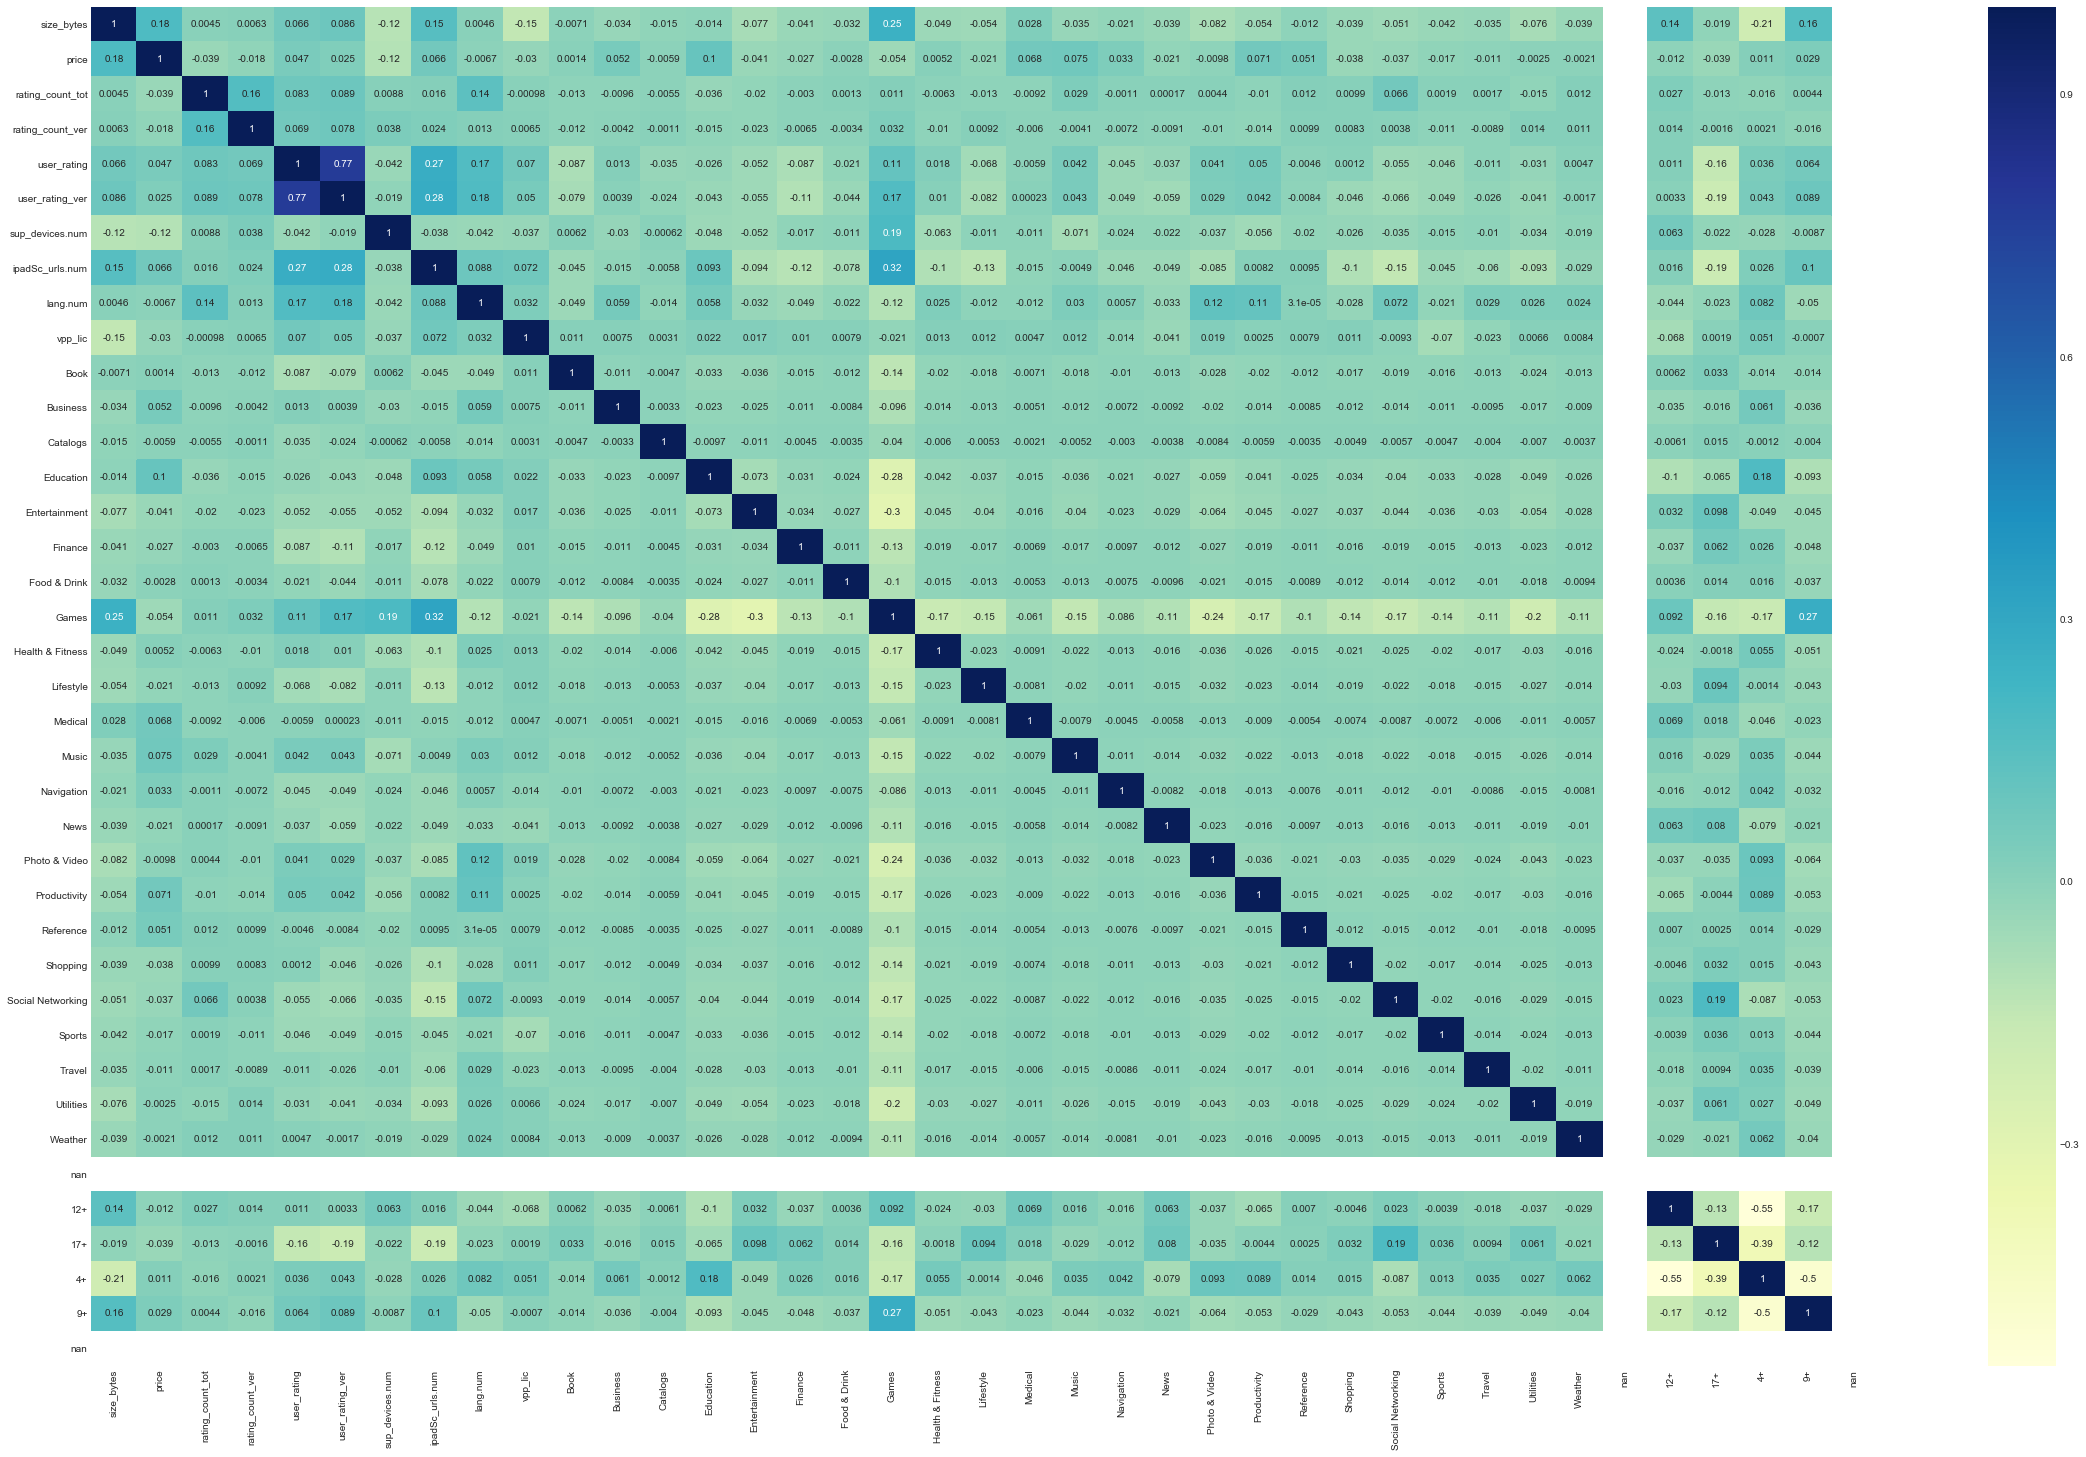

In [ ]:
#  Plotting the heatmap to find correlation
numericDataSet = dataSet.drop(labels=['id','ver', 'track_name'], axis=True)

fig, ax = plt.subplots(figsize=(40,25))

sns.heatmap(numericDataSet.corr(), annot=True, cmap='YlGnBu');

In [ ]:
sns.pairplot(dataSet.drop(labels=['id', 'ver', 'track_name'], axis=1), hue="prime_genre")

In [ ]:
def correlation_heat_map(df):
   corrs = df.corr()

   # Set the default matplotlib figure size:
   fig, ax = plt.subplots(figsize=(40,25))

   # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
   mask = np.zeros_like(corrs, dtype=np.bool)
   mask[np.triu_indices_from(mask)] = True

   # Plot the heatmap with Seaborn.
   # Assign the matplotlib axis the function returns. This allow us to resize the labels.
   cmap = sns.diverging_palette(220, 10, as_cmap=True)
   ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

   # Resize the labels.
   ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
   ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

   # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
   plt.show()

correlation_heat_map(numericDataSet);

In [ ]:
#  Plot the Prime Genres and the content rating for each

plt.figure(figsize=(10, 8));
sns.factorplot('cont_rating', col='prime_genre', data=dataSet,  
               kind="count");
plt.title('Content rating counts by Genre')
plt.xlabel('Content Rating')
plt.ylabel('Genre')
plt.legend();

In [ ]:
# Plot the Prime Genres and the user rating for current version for each

plt.figure(figsize=(10, 8));
sns.factorplot('user_rating_ver', col='prime_genre', data=dataSet,  
               kind="count", legend=True);
plt.title('Plot of Prime Genres and the user rating for current version for each genre');

In [ ]:
# Plot the Prime Genres and the rating count total for each

plt.figure(figsize=(40,25));
sns.factorplot('ipadSc_urls.num', data=dataSet,  
               kind="count", hue='user_rating', legend=True);
plt.title('Number of screen shots for Apps by genre')
plt.xlabel('Number of sreen shots')
plt.ylabel('Count');

In [ ]:
# Plot the Prime Genres and the number of supporting devices 

plt.figure(figsize=(10, 8));
sns.factorplot('sup_devices.num', col='prime_genre', data=dataSet,  
               kind="count", legend=True);

In [ ]:
dataSet['Free_Paid'] = ['free' if each == 0.0 else 'paid' for each in dataSet['price']]

sns.set(rc={'figure.figsize':(8, 5)})
sns.countplot(x='Free_Paid', data=dataSet, palette="Set1")
plt.title('Apps as Free or Paid')
plt.xlabel('Total number of Apps')
plt.ylabel('Count');

In [ ]:
sns.set(rc={'figure.figsize':(40, 25)})
sns.countplot(x="prime_genre", hue='Free_Paid', data=dataSet, palette="Set3")
plt.title('Plot of Apps by genres as Free or Paid')
plt.xlabel('Apps by Genre')
plt.ylabel('Count');

In [ ]:
sns.countplot(x='cont_rating', hue='prime_genre', data=dataSet)
plt.title('Content rating counts by Genre')
plt.xlabel('Content Rating')
plt.ylabel('Genre');

In [ ]:
ax.set(xlim=(10, 80))

#  Plot user rating and user rating for current version for all genres
sns.factorplot('user_rating', data=dataSet,  
               kind="count",hue = 'prime_genre', legend=True);
plt.title('User rating counts by Genre')
plt.xlabel('User Rating')
plt.ylabel('Count');

In [ ]:
sns.factorplot('user_rating_ver', data=dataSet,  
               kind="count",hue = 'prime_genre', legend=True)
plt.title("User rating for the App's current version by Genre")
plt.xlabel('User Rating for current version')
plt.ylabel('Count');